<a href="https://colab.research.google.com/github/seokhee516/Project/blob/main/%EC%97%AC%EB%9F%AC%EA%B0%80%EC%A7%80_%EC%8B%9C%EB%8F%84%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 지역에 따라서 선호하는 게임 장르가 다를까
2. 연도별 게임 트렌드가 있을까
3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

어떤 요인이 출고량(y)에 영향을 줄까?
x1 요인이 높을 때 (낮을 때)
x2 요인이 있을 때 (없을 때)

출고량(y)이 높아진다.

x 후보들
1. 누적 판매 기준 장르가 액션, 스포츠, 슈팅, 롤 플레잉 순으로 높았다.

2. 누적 판매 기준 플랫폼이 PS2, X360, PS3, Wii 순으로 높았다.

TotalSlales를 target으로 잡고 상관분석을 수행하면 어떨까?

그렇다면 범주형 변수 장르, 플랫폼, 제조사를 어떻게 처리하면 좋을까?
- 분산분석과 사후검정(X 범주 별로 Y값 평균의 차이가 있다)으로 접근

ANOVA 일원분석  
12가지의 게임 장르가 있다. 북미, 유럽, 일본, 기타 지역 그룹에서 서로 다른 종류의 게임 장르를 판매하고, 판매량을 나타냈다. 장르에 따른 판매의 차이가 있는가?
- 독립변수: 장르
- 종속변수: 판매량

# 한글 안정화

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155047 files and di

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

# 폰트 크기 

In [2]:
plt.rcParams.update({'font.size': 15})
plt.rcParams.update({'legend.fontsize': 15})
plt.rcParams.update({'xtick.labelsize': 22})
plt.rcParams.update({'ytick.labelsize': 22})
plt.rcParams.update({'axes.labelsize': 22})
plt.rcParams.update({'figure.titlesize': 30})
plt.rcParams.update({'axes.titlesize': 30})

# 데이터 불러오기

In [3]:
import pandas as pd
import numpy as np
import missingno as msno
from scipy import stats
#import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [4]:
df = pd.read_csv('df.csv', index_col=0)

In [ ]:
df.shape

(16241, 10)

In [ ]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40000.0,0.0,0.0,0.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20000.0,0.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40000.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0


# 장르별 출고량 평균, 지역별 비교

In [ ]:
df.drop('Year',axis=1).groupby('Genre').mean()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,265046.296296,158530.864198,48333.333333,56787.037037
Adventure,80276.025237,50205.047319,40906.940063,13170.347003
Fighting,263892.215569,119640.718563,104359.281437,43293.413174
Misc,234818.560381,123825.104105,61975.014872,43212.373587
Platform,510171.821306,229816.723940,149518.900344,58934.707904
Puzzle,214805.653710,89169.611307,99363.957597,21978.798587
Racing,290976.210008,192797.374897,46201.804758,62764.561116
Role-Playing,217583.617747,124976.109215,234081.911263,38723.549488
Shooter,448812.500000,242367.187500,29828.125000,79578.125000


- 출고량 평균이란, 각 지역에서 장르에 따라 출고량을 모두 합한 뒤 데이터 갯수로 나눈 값.
- 예를 들어 북미 액션 장르는 평균적으로 26만5천장이 팔린다.

In [ ]:
df.drop('Year',axis=1).groupby('Genre').describe()

NA_Sales                 ... Other_Sales            
                count           mean  ...         75%         max
Genre                                 ...                        
Action         3240.0  265046.296296  ...     50000.0  10570000.0
Adventure      1268.0   80276.025237  ...     10000.0    830000.0
Fighting        835.0  263892.215569  ...     40000.0   1410000.0
Misc           1681.0  234818.560381  ...     30000.0   2850000.0
Platform        873.0  510171.821306  ...     50000.0   2900000.0
Puzzle          566.0  214805.653710  ...     10000.0   1180000.0
Racing         1219.0  290976.210008  ...     50000.0   7530000.0
Role-Playing   1465.0  217583.617747  ...     30000.0   1510000.0
Shooter        1280.0  448812.500000  ...     70000.0   2520000.0
Simulation      846.0  214456.264775  ...     30000.0   2750000.0
Sports         2299.0  290239.234450  ...     40000.0   8460000.0
Strategy        669.0  101390.134529  ...     10000.0    590000.0

[12 rows x 32 columns]

In [ ]:
df.drop('Year',axis=1).groupby('Genre').count()

,Name,Platform,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,,,,
Action,3240,3240,3240,3240,3240,3240,3240
Adventure,1268,1268,1268,1268,1268,1268,1268
Fighting,835,835,835,835,835,835,835
Misc,1681,1681,1681,1681,1681,1681,1681
Platform,873,873,873,873,873,873,873
Puzzle,566,566,566,566,566,566,566
Racing,1219,1219,1219,1219,1219,1219,1219
Role-Playing,1465,1465,1465,1465,1465,1465,1465
Shooter,1280,1280,1280,1280,1280,1280,1280


In [ ]:
sdata

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,0.034263,0.305543,-0.669537,0.656742
Adventure,-1.545559,-1.593678,-0.804626,-1.610285
Fighting,0.024395,-0.376298,0.349598,-0.044604
Misc,-0.224190,-0.302936,-0.421389,-0.048816
Platform,2.130134,1.555361,1.171071,0.768370
Puzzle,-0.395305,-0.910533,0.258731,-1.152455
Racing,0.255969,0.906320,-0.708311,0.967431
Role-Playing,-0.371552,-0.282756,2.709307,-0.282128
Shooter,1.605500,1.775402,-1.006155,1.841335


In [ ]:
action = df[df["Genre"]=="Action"]["NA_Sales"]
misc = df[df["Genre"]=="Action"]["EU_Sales"]
stats.ttest_ind(action,misc)

Ttest_indResult(statistic=8.617843119508686, pvalue=8.475399461291623e-18)

귀무가설: 북미지역의 Action 장르 평균 판매량과 유럽지역의 Action 장르 평균 판매량은 유의미한 차이가 있다고 보기 어렵다(같다).  
대립가설: 북미지역의 Action 장르 평균 판매량과 유럽지역의 Action 장르 평균 판매량은 유의미한 차이가 있다(같지 않다).  
신뢰도: 95%

- 표준화를 진행했을 시 북미와 유럽 평균이 유사하고 일본과는 달랐다.
- 이는 아래 상관분석 결과와 같은 의미를 가진다,

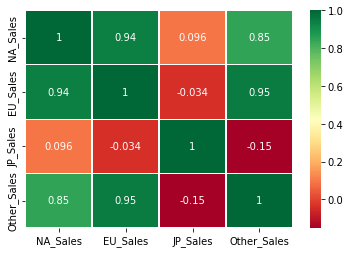

In [ ]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn',linewidths=0.2)

In [ ]:
data.corr()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
NA_Sales,1.000000,0.942317,0.096376,0.848786
EU_Sales,0.942317,1.000000,-0.033686,0.951116
JP_Sales,0.096376,-0.033686,1.000000,-0.150381
Other_Sales,0.848786,0.951116,-0.150381,1.000000


In [ ]:
data = df.drop('Year',axis=1).groupby('Genre').mean()

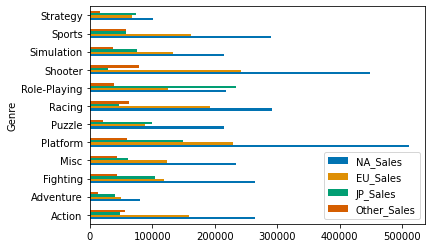

In [ ]:
data.plot(kind="barh")

Text(0.5, 1.0, 'Favorite genre in other regions')

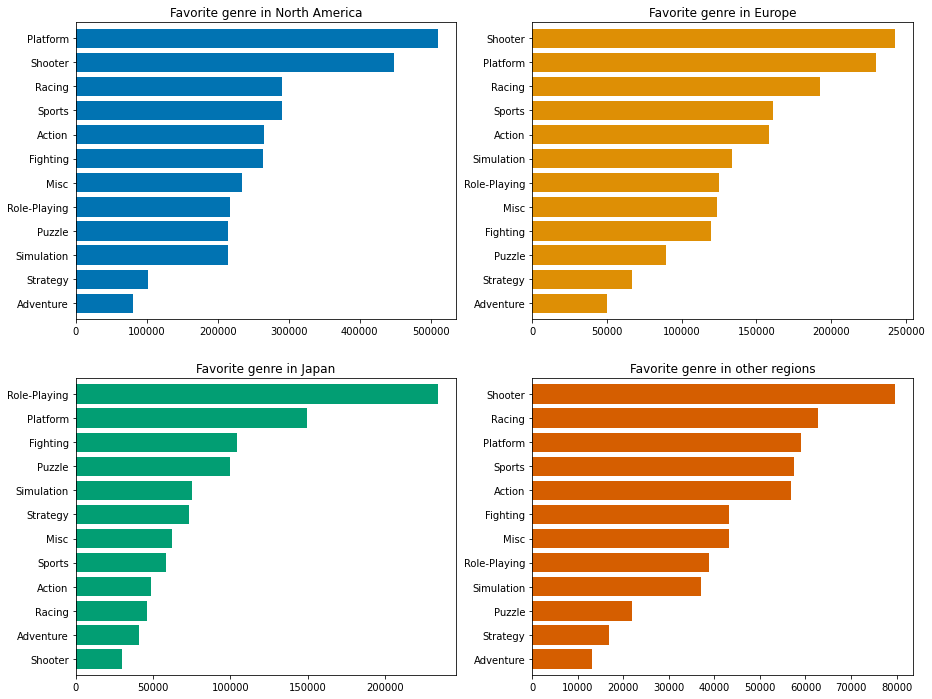

In [ ]:
f,ax=plt.subplots(2,2,figsize=(15,12))

data.iloc[:,0].sort_values(ascending=True).plot(kind="barh",width=0.8,xlabel="",ax=ax[0,0])
ax[0,0].set_title('Favorite genre in North America')

data.iloc[:,1].sort_values(ascending=True).plot(kind="barh",color='#de8f05',width=0.8,xlabel="",ax=ax[0,1])
ax[0,1].set_title('Favorite genre in Europe')

data.iloc[:,2].sort_values(ascending=True).plot(kind="barh",color='#029e73',width=0.8,xlabel="",ax=ax[1,0])
ax[1,0].set_title('Favorite genre in Japan')

data.iloc[:,3].sort_values(ascending=True).plot(kind="barh",color='#d55e00',width=0.8,xlabel="",ax=ax[1,1])
ax[1,1].set_title('Favorite genre in other regions')

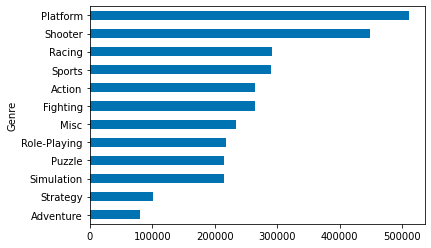

In [ ]:
data.iloc[:,0].sort_values(ascending=True).plot(kind="barh")

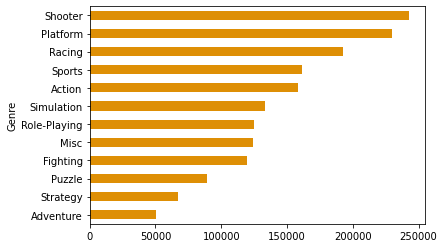

In [ ]:
data.iloc[:,1].sort_values(ascending=True).plot(kind="barh",color='#de8f05')

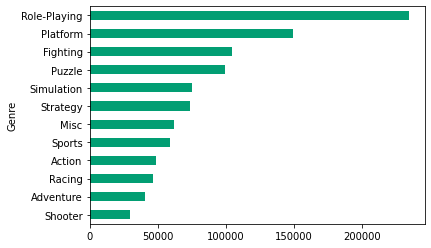

In [ ]:
data.iloc[:,2].sort_values(ascending=True).plot(kind="barh",color='#029e73')

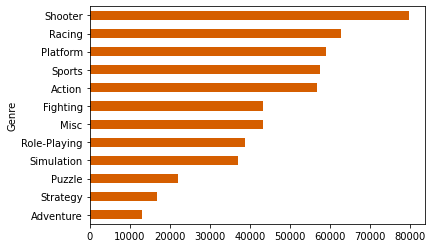

In [ ]:
data.iloc[:,3].sort_values(ascending=True).plot(kind="barh",color='#d55e00')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
sdata = pd.DataFrame(scaler.fit_transform(data), index = data.index, columns = data.columns)

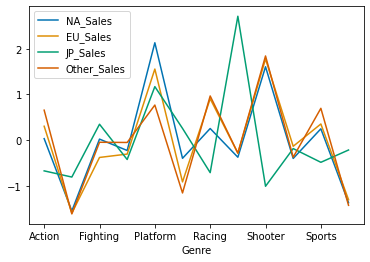

In [ ]:
sdata.plot()

# 장르별 출고량 합, 지역별 비교

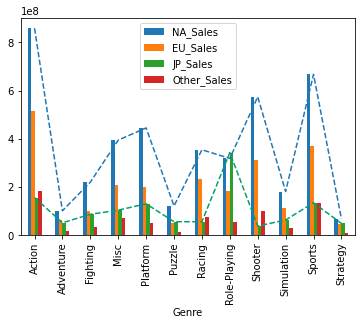

In [ ]:
data = df.drop('Year',axis=1).groupby('Genre').sum()
data.plot(kind="bar")
plt.plot(data.iloc[:,0].index, data.iloc[:,0].values, '--');
plt.plot(data.iloc[:,2].index, data.iloc[:,2].values, '--', color = '#029e73');

# 연도별 게임트렌드

- 데이터 개수의 편향이 있을 수 있다. 
- 전체 데이터에서 연도별 비중을 알아보자.

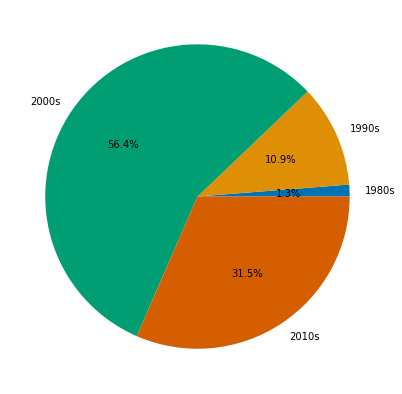

In [ ]:
y_df=pd.DataFrame([df[in80].shape[0],
                   df[in90].shape[0],
                   df[in00].shape[0],
                   df[in10].shape[0]],
                   index=['1980s','1990s','2000s','2010s'])
      
y_df[0].plot.pie(autopct='%1.1f%%',ylabel='')

In [ ]:
print(round(df[in80].shape[0]/df.shape[0],2),round(df[in90].shape[0]/df.shape[0],2), round(df[in00].shape[0]/df.shape[0],2), round(df[in10].shape[0]/df.shape[0],2))

0.01 0.11 0.56 0.32


- 데이터의 수가 00년대 데이터에 편향되어 있다.
- 따라서 수치를 구하고 데이터의 개수로 나눠주는 평균을 구해 분석을 해야 한다.
- 하지만 그 자체로 의미가 있을 수 있다. 과거에는 게임자체가 출시되지 않아 데이터가 적은 것일 수도 있기 때문이다. 

In [ ]:
in80 = ((df['Year'] >= 1980) & (df['Year'] <=1989))
in90 = ((df['Year'] >= 1990) & (df['Year'] <=1999))
in00 = ((df['Year'] >= 2000) & (df['Year'] <=2009))
in10 = ((df['Year'] >= 2010) & (df['Year'] <=2020))

In [ ]:
genre_years_df = pd.DataFrame({
    '80s':df.loc[in80,'Genre'].value_counts(),
    '90s':df.loc[in90,'Genre'].value_counts(),
    '00s':df.loc[in00,'Genre'].value_counts(),
    '10s':df.loc[in10,'Genre'].value_counts()
})

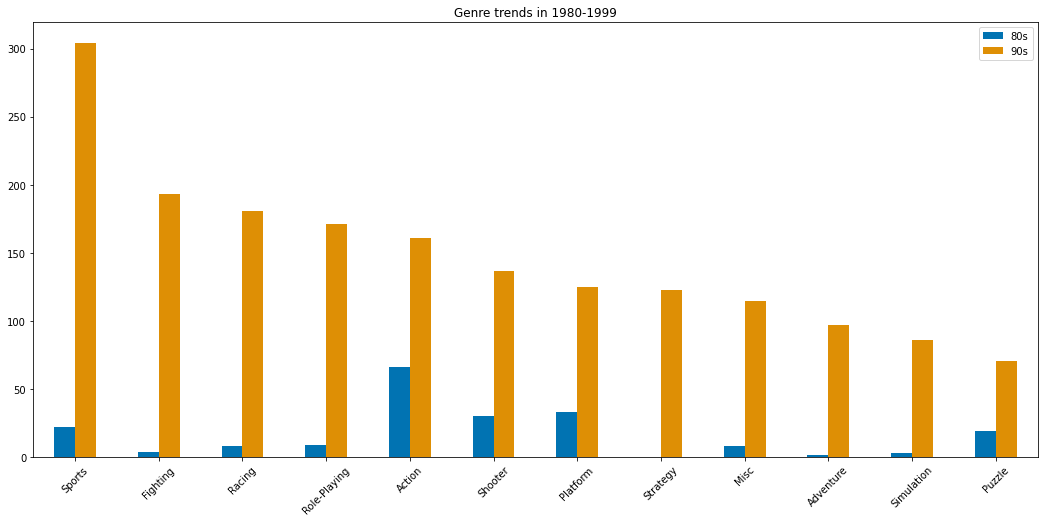

In [ ]:
genre_years_df.sort_values(by=['90s'], axis=0, ascending=False, inplace=True)
genre_years_df.iloc[:,:2].plot(kind='bar')
plt.rcParams["figure.figsize"] = (18,8)
plt.xticks(rotation=45)
plt.title('Genre trends in 1980-1999');

In [ ]:
platform_years_df = pd.DataFrame({
    '80s':df.loc[in80,'Platform'].value_counts(),
    '90s':df.loc[in90,'Platform'].value_counts(),
    '00s':df.loc[in00,'Platform'].value_counts(),
    '10s':df.loc[in10,'Platform'].value_counts()
})
platform_years_df.iloc[:,:2].dropna(how='all')

,80s,90s
2600,115.0,NaN
3DO,NaN,3.0
DC,NaN,21.0
DS,1.0,NaN
GB,11.0,59.0
GEN,NaN,27.0
GG,NaN,1.0
N64,NaN,244.0
NES,75.0,23.0
NG,NaN,12.0


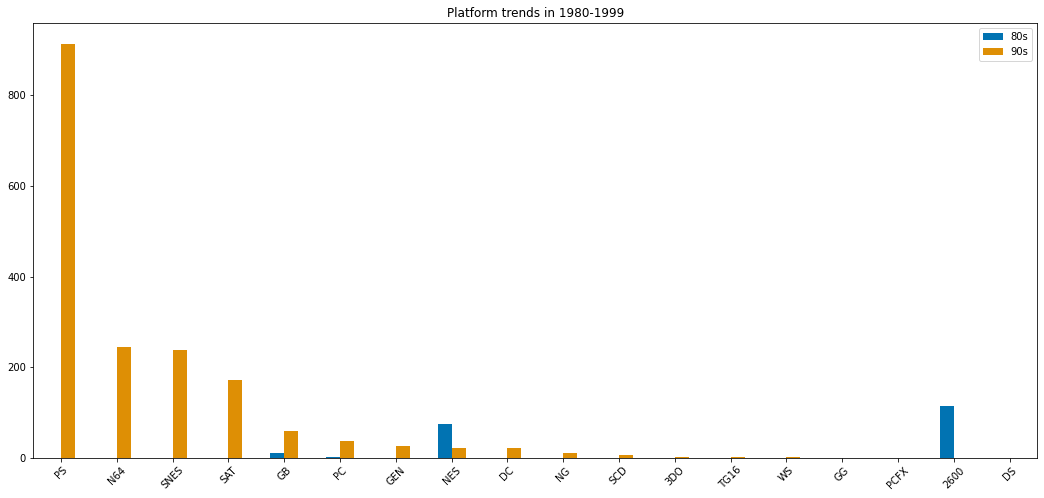

In [ ]:
platform_years_df.sort_values(by=['90s'], axis=0, ascending=False, inplace=True)
platform_years_df2 = platform_years_df.iloc[:,:2].dropna(how='all')
platform_years_df2.plot(kind='bar')
plt.rcParams["figure.figsize"] = (18,8)
plt.xticks(rotation=45)
plt.title('Platform trends in 1980-1999');

# 출고량 높은 게임 분석

In [ ]:
df.describe().iloc[1:,1:]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
mean,2.651955e+05,1.473782e+05,7.828274e+04,4.823410e+04,5.390906e+05
std,8.224307e+05,5.083397e+05,3.092720e+05,1.896780e+05,1.563905e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+04
50%,8.000000e+04,2.000000e+04,0.000000e+00,1.000000e+04,1.700000e+05
75%,2.400000e+05,1.100000e+05,4.000000e+04,4.000000e+04,4.800000e+05
max,4.149000e+07,2.902000e+07,1.022000e+07,1.057000e+07,8.274000e+07


In [ ]:
round(df.describe().iloc[1:-1,1:]/1000,1)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
mean,265.2,147.4,78.3,48.2,539.1
std,822.4,508.3,309.3,189.7,1563.9
min,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,60.0
50%,80.0,20.0,0.0,10.0,170.0
75%,240.0,110.0,40.0,40.0,480.0


In [ ]:
sales_df = df.describe().iloc[1:,1:]

In [ ]:
sales_df.iloc[:-1,:] = sales_df.iloc[:-1,:]/1000
sales_df.iloc[-1,:] = sales_df.iloc[-1,:]/1000000

In [ ]:
sales_df = round(sales_df,1).astype(str)

In [ ]:
sales_df.iloc[:-1,:] = sales_df.iloc[:-1,:].astype(str) + 'K'
sales_df.iloc[-1,:] = sales_df.iloc[-1,:].astype(str) + 'M'

In [ ]:
sales_df

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
mean,265.2K,147.4K,78.3K,48.2K,539.1K
std,822.4K,508.3K,309.3K,189.7K,1563.9K
min,0.0K,0.0K,0.0K,0.0K,0.0K
25%,0.0K,0.0K,0.0K,0.0K,60.0K
50%,80.0K,20.0K,0.0K,10.0K,170.0K
75%,240.0K,110.0K,40.0K,40.0K,480.0K
max,41.5M,29.0M,10.2M,10.6M,82.7M


In [ ]:
sales_df.to_csv("sales_df.csv")

전체 지역 매출 합 값인 'Total_Sales'을 구했다. 

In [5]:
df['Total_Sales'] = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)

## 상위 10%

In [ ]:
df['Total_Sales'].quantile(q=0.25, interpolation='nearest')

60000.0

In [ ]:
test = df[df['Total_Sales']<60000].sort_values(by='Total_Sales', ascending=False)
print(test.shape)
test.head()

(3769, 10)


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
14806,Earth Defense Force 4.1: The Shadow of New Des...,PS4,2015.0,Shooter,Xseed Games,20000.0,20000.0,0.0,10000.0,50000.0
15737,Blues Brothers 2000,N64,2000.0,Platform,Virgin Interactive,40000.0,10000.0,0.0,0.0,50000.0
8570,The Typing of the Dead,DC,2000.0,Shooter,Sega,0.0,0.0,50000.0,0.0,50000.0
2695,The Idolmaster 2,X360,2011.0,Simulation,Namco Bandai Games,0.0,0.0,50000.0,0.0,50000.0
8489,Resident Evil 6,PC,2012.0,Shooter,Capcom,0.0,40000.0,0.0,10000.0,50000.0


In [ ]:
df['Total_Sales'].quantile(q=0.9, interpolation='nearest')

1210000.0

In [6]:
top10 = df[df['Total_Sales']>1210000].sort_values(by='Total_Sales', ascending=False)
print(top10.shape)
top10.head()

(1623, 10)


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2855,Wii Sports,Wii,2006.0,Sports,Nintendo,41490000.0,29020000.0,3770000.0,8460000.0,82740000.0
4113,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29080000.0,3580000.0,6810000.0,770000.0,40240000.0
12316,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15850000.0,12880000.0,3790000.0,3310000.0,35830000.0
3288,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15750000.0,11010000.0,3280000.0,2960000.0,33000000.0
7673,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11270000.0,8890000.0,10220000.0,1000000.0,31380000.0


In [15]:
top10.head(20)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2855,Wii Sports,Wii,2006.0,Sports,Nintendo,41490000.0,29020000.0,3770000.0,8460000.0,82740000.0
4113,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29080000.0,3580000.0,6810000.0,770000.0,40240000.0
12316,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15850000.0,12880000.0,3790000.0,3310000.0,35830000.0
3288,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15750000.0,11010000.0,3280000.0,2960000.0,33000000.0
7673,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11270000.0,8890000.0,10220000.0,1000000.0,31380000.0
1187,Tetris,GB,1989.0,Puzzle,Nintendo,23200000.0,2260000.0,4220000.0,580000.0,30260000.0
6796,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11380000.0,9230000.0,6500000.0,2900000.0,30010000.0
2959,Wii Play,Wii,2006.0,Misc,Nintendo,14030000.0,9200000.0,2930000.0,2850000.0,29010000.0
16176,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14590000.0,7060000.0,4700000.0,2260000.0,28610000.0
10280,Duck Hunt,NES,1984.0,Shooter,Nintendo,26930000.0,630000.0,280000.0,470000.0,28310000.0


장르비중

In [19]:
top10.groupby('Genre').mean()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,,
Action,2006.492401,1.420456e+06,9.404863e+05,2.068389e+05,343738.601824,2.911520e+06
Adventure,2003.800000,1.234667e+06,9.066667e+05,2.593333e+05,202666.666667,2.603333e+06
Fighting,2002.704082,1.332653e+06,5.982653e+05,3.415306e+05,208367.346939,2.480816e+06
Misc,2005.626866,1.587388e+06,9.444030e+05,3.505970e+05,302910.447761,3.185299e+06
Platform,2001.025806,2.096387e+06,9.476129e+05,6.754839e+05,223870.967742,3.943355e+06
Puzzle,1999.386364,1.702273e+06,7.075000e+05,7.263636e+05,156136.363636,3.292273e+06
Racing,2003.492537,1.481642e+06,1.069552e+06,3.087313e+05,367985.074627,3.227910e+06
Role-Playing,2005.538012,1.250819e+06,7.698830e+05,1.171637e+06,214619.883041,3.406959e+06
Shooter,2006.886700,2.003448e+06,1.059606e+06,9.674877e+04,357832.512315,3.517635e+06


In [18]:
top10.groupby('Genre').mean().sort_values(by='Total_Sales',ascending=False).iloc[:10,-1]

Genre
Platform        2.096387e+06
Shooter         2.003448e+06
Role-Playing    1.250819e+06
Puzzle          1.702273e+06
Racing          1.481642e+06
Misc            1.587388e+06
Sports          1.470996e+06
Action          1.420456e+06
Simulation      1.196429e+06
Adventure       1.234667e+06
Name: NA_Sales, dtype: float64

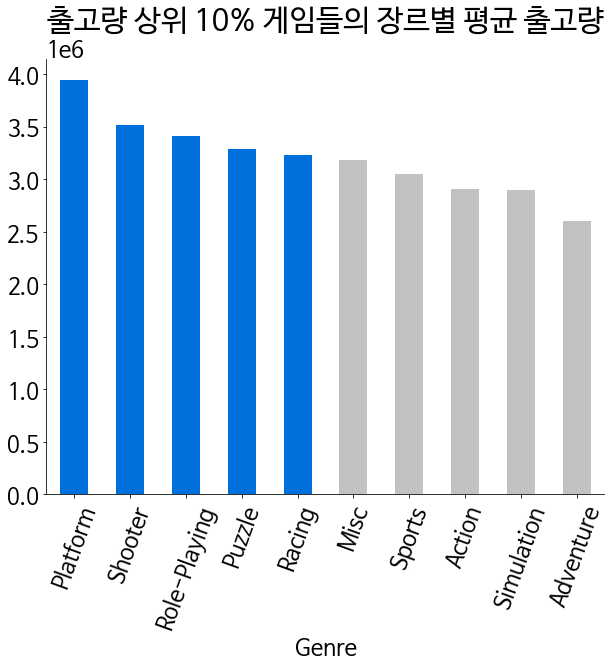

In [25]:
data = top10.groupby('Genre').mean().sort_values(by='Total_Sales',ascending=False).iloc[:10,-1]
color = np.full(len(data), '#c2c2c2')
color[[0, 1, 2, 3, 4]] = '#0070dd'
data.plot(kind='bar',color=color)

plt.rcParams["figure.figsize"] = (10,8)
plt.xticks(rotation=70)
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.title('출고량 상위 10% 게임들의 장르별 평균 출고량', pad=30);

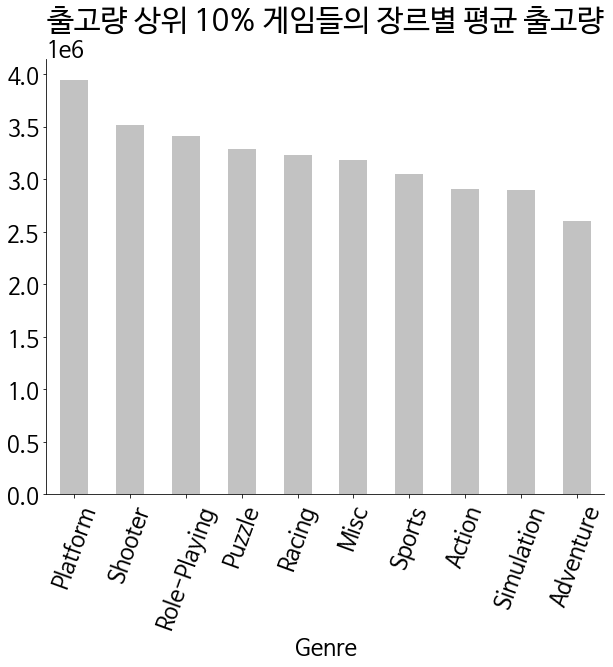

In [27]:
data = top10.groupby('Genre').mean().sort_values(by='Total_Sales',ascending=False).iloc[:10,-1]
color = np.full(len(data), '#c2c2c2')
#color[[0, 1, 2, 3, 4]] = '#0070dd'
data.plot(kind='bar',color=color)

plt.rcParams["figure.figsize"] = (10,8)
plt.xticks(rotation=70)
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.title('출고량 상위 10% 게임들의 장르별 평균 출고량', pad=30);

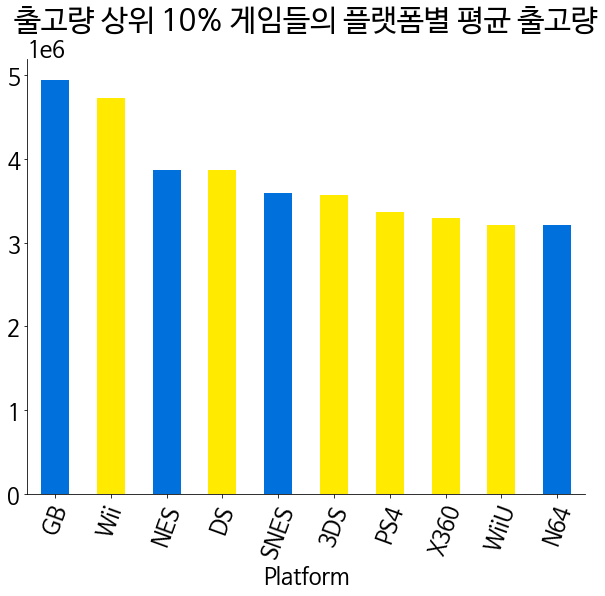

In [28]:
data = top10.groupby('Platform').mean().sort_values(by='Total_Sales',ascending=False).iloc[:10,-1]
color = np.full(len(data), '#c2c2c2')
color[[0,2,4,9]] = '#0070dd'
color[[1,3,5,6,7,8]] = '#ffea00'
data.plot(kind='bar',color=color)

plt.rcParams["figure.figsize"] = (10,8)
plt.xticks(rotation=70)
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.title('출고량 상위 10% 게임들의 플랫폼별 평균 출고량', pad=30);

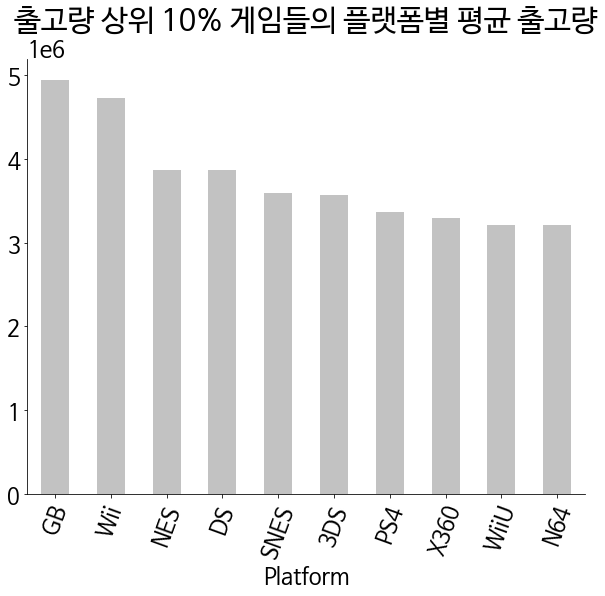

In [29]:
data = top10.groupby('Platform').mean().sort_values(by='Total_Sales',ascending=False).iloc[:10,-1]
color = np.full(len(data), '#c2c2c2')
#color[[0,2,4,9]] = '#0070dd'
#color[[1,3,5,6,7,8]] = '#ffea00'
data.plot(kind='bar',color=color)

plt.rcParams["figure.figsize"] = (10,8)
plt.xticks(rotation=70)
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.title('출고량 상위 10% 게임들의 플랫폼별 평균 출고량', pad=30);

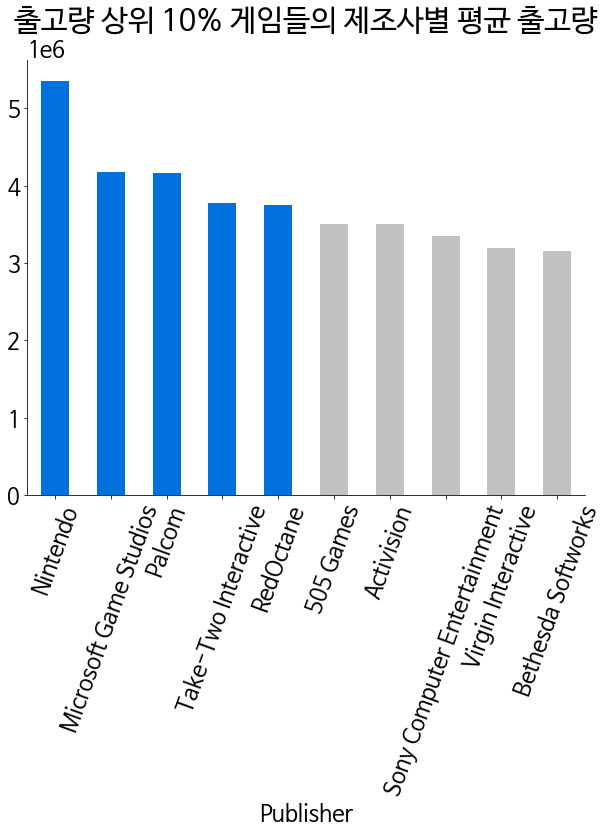

In [32]:
data = top10.groupby('Publisher').mean().sort_values(by='Total_Sales',ascending=False).iloc[:10,-1]
color = np.full(len(data), '#c2c2c2')
color[[0,1,2,3,4]] = '#0070dd'
data.plot(kind='bar',color=color)

plt.rcParams["figure.figsize"] = (15,8)
plt.xticks(rotation=70)
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.title('출고량 상위 10% 게임들의 제조사별 평균 출고량', pad=30);

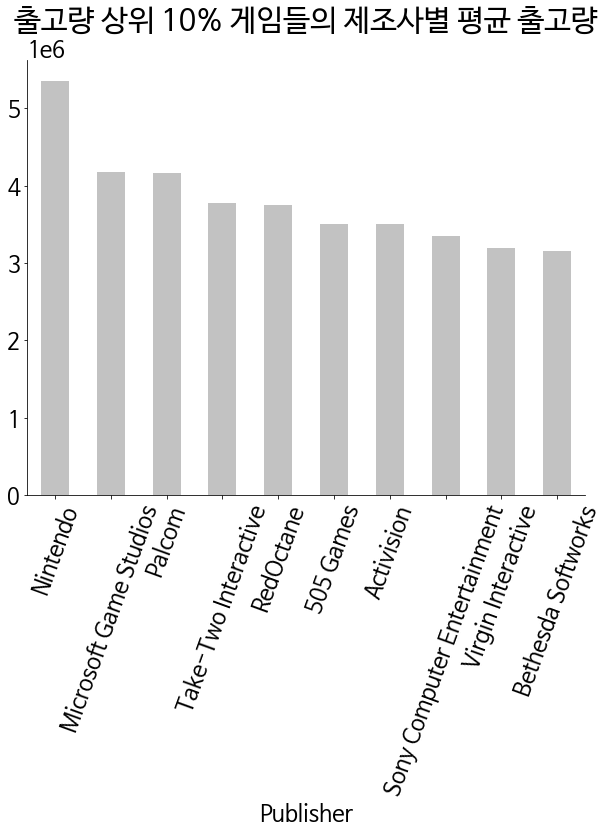

In [31]:
data = top10.groupby('Publisher').mean().sort_values(by='Total_Sales',ascending=False).iloc[:10,-1]
color = np.full(len(data), '#c2c2c2')
#color[[0,1,2,3,4]] = '#0070dd'
data.plot(kind='bar',color=color)

plt.rcParams["figure.figsize"] = (10,8)
plt.xticks(rotation=70)
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.title('출고량 상위 10% 게임들의 제조사별 평균 출고량', pad=30);

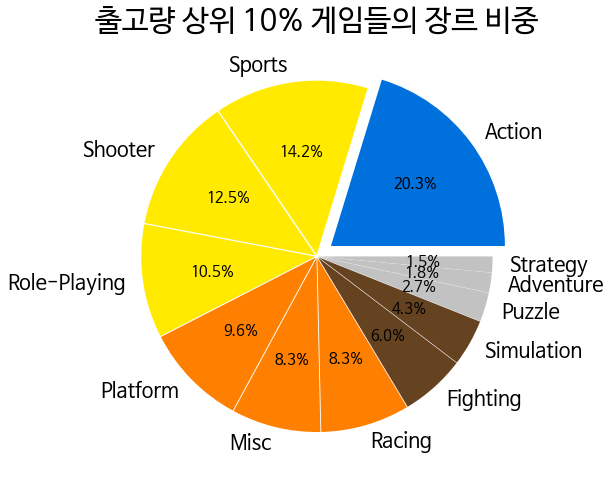

In [ ]:
data = top10['Genre'].value_counts()
explode = np.full(len(data), 0.01)
explode[0] = 0.1
color = np.full(len(data), '#c2c2c2')
color[0] = '#0070dd'
color[[1,2,3]] = '#ffea00'
color[[4,5,6]] = '#ff8000'
color[[7,8]] = '#654321'
ax = data.plot.pie(autopct='%1.1f%%',
              explode=explode,
              colors=color)
ax.set_title('출고량 상위 10% 게임들의 장르 비중')
ax.set_ylabel('')
plt.rcParams["figure.figsize"] = (10,8) 

In [ ]:
top10.groupby('Genre').size()

Genre
Action          329
Adventure        30
Fighting         98
Misc            134
Platform        155
Puzzle           44
Racing          134
Role-Playing    171
Shooter         203
Simulation       70
Sports          231
Strategy         24
dtype: int64

플랫폼

In [ ]:
top10.groupby('Platform').size().sort_values(ascending=False)

Platform
PS2     263
X360    193
PS3     190
PS      152
Wii     124
DS      116
PS4      61
NES      56
PC       56
GBA      54
GB       47
N64      41
3DS      39
XOne     38
GC       37
SNES     37
XB       35
PSP      35
2600     15
WiiU     14
GEN      10
PSV       6
DC        2
SAT       1
SCD       1
dtype: int64

In [ ]:
top10_Platform = top10['Platform'].value_counts()
top10_Platform2 = top10_Platform[top10_Platform.values > 20]
top10_Platform2['the others'] = top10_Platform[top10_Platform.values <20].sum()

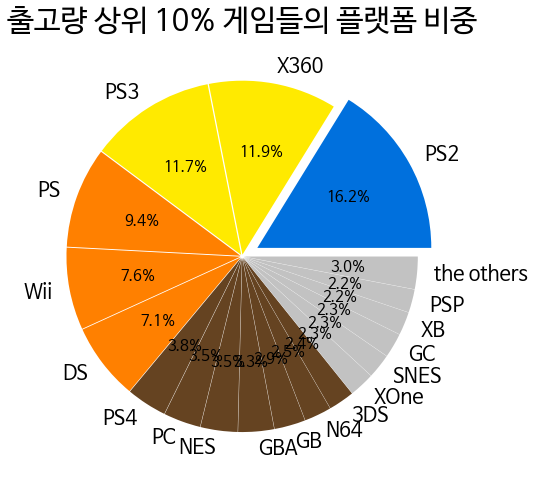

In [ ]:
data = top10_Platform2
explode = np.full(len(data), 0.01)
explode[0] = 0.1
color = np.full(len(data), '#c2c2c2')
color[0] = '#0070dd'
color[[1,2]] = '#ffea00'
color[[3,4,5]] = '#ff8000'
color[[6,7,8,9,10,11,12]] = '#654321'
ax = data.plot.pie(autopct='%1.1f%%',
              explode=explode,
              colors=color)
ax.set_title('출고량 상위 10% 게임들의 플랫폼 비중')
ax.set_ylabel('')
plt.rcParams["figure.figsize"] = (10,8) 

제조사 


In [ ]:
top10.groupby('Publisher').size().sort_values(ascending=False)

Publisher
Nintendo                       296
Electronic Arts                266
Activision                     129
Sony Computer Entertainment    120
Ubisoft                         87
                              ... 
JVC                              1
Hudson Soft                      1
Hello Games                      1
GungHo                           1
3DO                              1
Length: 80, dtype: int64

한 개 이하 제조사 플랫폼 the others로 묶기

In [ ]:
top10_Publisher = top10['Publisher'].value_counts()

In [ ]:
top10_Publisher.values

array([296, 266, 129, 120,  87,  77,  68,  48,  47,  46,  45,  40,  36,
        36,  28,  24,  24,  20,  17,  14,  11,  11,   9,   9,   8,   7,
         7,   7,   5,   5,   5,   4,   4,   4,   3,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1])

In [ ]:
top10_Publisher2 = top10_Publisher[top10_Publisher.values > 30]

In [ ]:
top10_Publisher2['the others'] = top10_Publisher[top10_Publisher.values <30].sum()

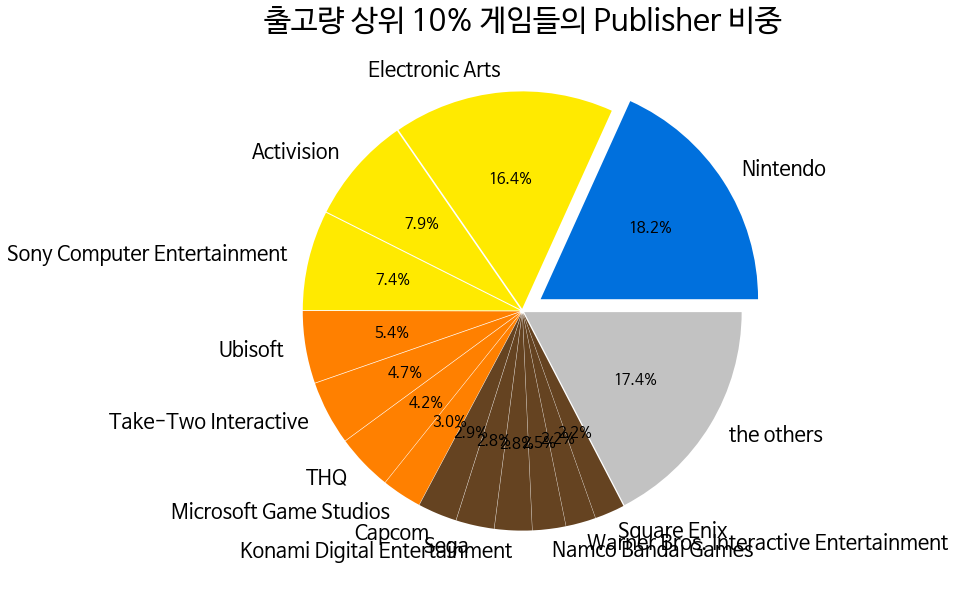

In [ ]:
data = top10_Publisher2
explode = np.full(len(data), 0.01)
explode[0] = 0.1
color = np.full(len(data), '#654321')
color[0] = '#0070dd'
color[[1,2,3]] = '#ffea00'
color[[4,5,6,7]] = '#ff8000'
color[-1]= '#c2c2c2'
ax = data.plot.pie(autopct='%1.1f%%',
              explode=explode,
              colors=color)
ax.set_ylabel('')
plt.rcParams["figure.figsize"] = (10,8) 
plt.title('출고량 상위 10% 게임들의 Publisher 비중');
plt.rc('ytick', labelsize=18)

## 상위 0.1%

In [ ]:
top = df_copy[df_copy['Total_Sales']>21390000].sort_values(by='Total_Sales', ascending=False)
print(top.shape)
top.head()

(16, 10)


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2855,Wii Sports,Wii,2006.0,Sports,Nintendo,41490000.0,29020000.0,3770000.0,8460000.0,82740000.0
4113,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29080000.0,3580000.0,6810000.0,770000.0,40240000.0
12316,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15850000.0,12880000.0,3790000.0,3310000.0,35830000.0
3288,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15750000.0,11010000.0,3280000.0,2960000.0,33000000.0
7673,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11270000.0,8890000.0,10220000.0,1000000.0,31380000.0


In [ ]:
top = top.sort_values(by="Total_Sales",ascending=True)

이름 옆에 연도 넣기

In [ ]:
def merge_list(*args, fill_value = None):
  max_length = max([len(lst) for lst in args])
  merged = []
  for i in range(max_length):
    merged.append([
      args[k][i] if i < len(args[k]) else fill_value for k in range(len(args))
    ])
  return merged

In [ ]:
lst = merge_list((list(top.Name)),(top.Year.values.astype(int).astype(str)))

In [ ]:
index = []
for i in lst:
    index.append(i[0] + ' (' +i[1] + ')')

In [ ]:
index

['Kinect Adventures! (2010)',
 'Wii Fit Plus (2009)',
 'Wii Fit (2007)',
 'Pokemon Gold/Pokemon Silver (1999)',
 'Mario Kart DS (2005)',
 'Nintendogs (2005)',
 'Duck Hunt (1984)',
 'New Super Mario Bros. Wii (2009)',
 'Wii Play (2006)',
 'New Super Mario Bros. (2006)',
 'Tetris (1989)',
 'Pokemon Red/Pokemon Blue (1996)',
 'Wii Sports Resort (2009)',
 'Mario Kart Wii (2008)',
 'Super Mario Bros. (1985)',
 'Wii Sports (2006)']

In [ ]:
data = top.iloc[:,-5:-1]

In [ ]:
data.index = index

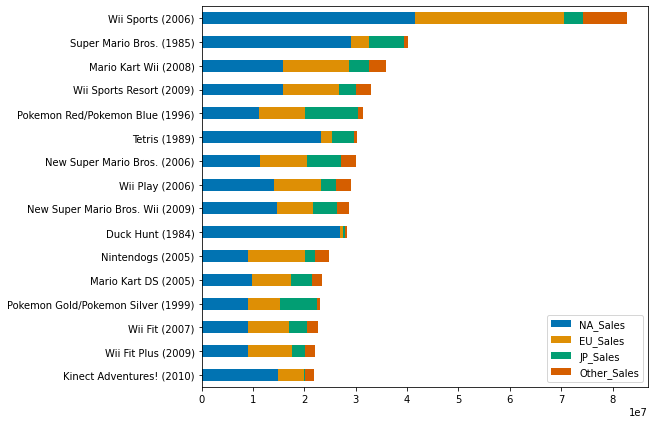

In [ ]:
data.plot(kind = 'barh', stacked=True)

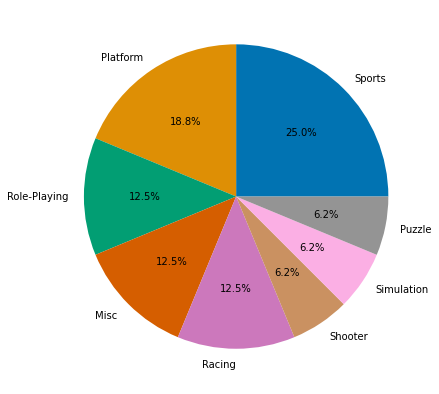

In [ ]:
top['Genre'].value_counts().plot.pie(autopct='%1.1f%%',ylabel="")

In [ ]:
top_group = top.groupby(['Publisher','Platform']).size()
top_group

Publisher               Platform
Microsoft Game Studios  X360        1
Nintendo                DS          3
                        GB          3
                        NES         2
                        Wii         7
dtype: int64

In [ ]:
group_sizes =top['Publisher'].value_counts().values
group_names = top['Publisher'].value_counts().index

In [ ]:
subgroup_names =top['Platform'].value_counts().index
subgroup_sizes = top['Platform'].value_counts().values

In [ ]:
width_num = 0.4

[None, None, None, None, None, None, None, None, None, None]

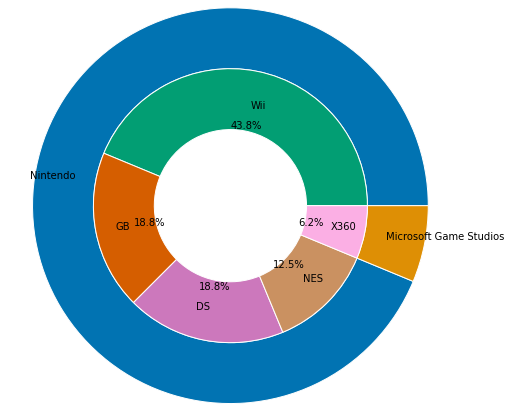

In [ ]:

# Outside Ring
fig, ax = plt.subplots()
ax.axis('equal')

pie_outside, _ = ax.pie(group_sizes, 
                        radius=1.3, 
                        labels=group_names, 
                        labeldistance=0.8,)
plt.setp(pie_outside,
         width=width_num,
         edgecolor='white')

# Inside Ring
pie_inside, plt_labels, junk = \
ax.pie(subgroup_sizes,
       radius=(1.3 - width_num),
       labels=subgroup_names, 
       labeldistance=0.75, 
       autopct='%1.1f%%')

plt.setp(pie_inside,
         width=width_num,
         edgecolor='white')


In [ ]:
top[top['Publisher']=='Microsoft Game Studios']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
4253,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14970000.0,4940000.0,240000.0,1670000.0,21820000.0


## top 10 -> 상위 0.1%로 변경

In [ ]:
df.sort_values(by='Total_Sales', ascending=False).iloc[:10,:]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2855,Wii Sports,Wii,2006.0,Sports,Nintendo,41490000.0,29020000.0,3770000.0,8460000.0,82740000.0
4113,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29080000.0,3580000.0,6810000.0,770000.0,40240000.0
12316,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15850000.0,12880000.0,3790000.0,3310000.0,35830000.0
3288,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15750000.0,11010000.0,3280000.0,2960000.0,33000000.0
7673,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11270000.0,8890000.0,10220000.0,1000000.0,31380000.0
1187,Tetris,GB,1989.0,Puzzle,Nintendo,23200000.0,2260000.0,4220000.0,580000.0,30260000.0
6796,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11380000.0,9230000.0,6500000.0,2900000.0,30010000.0
2959,Wii Play,Wii,2006.0,Misc,Nintendo,14030000.0,9200000.0,2930000.0,2850000.0,29010000.0
16176,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14590000.0,7060000.0,4700000.0,2260000.0,28610000.0
10280,Duck Hunt,NES,1984.0,Shooter,Nintendo,26930000.0,630000.0,280000.0,470000.0,28310000.0


In [ ]:
top10 = df.sort_values(by='Total_Sales', ascending=False).iloc[:10,:]

In [ ]:
top10 = top10.sort_values(by='Total_Sales',ascending=True)

In [ ]:
index = list(top10.Name)

<BarContainer object of 10 artists>

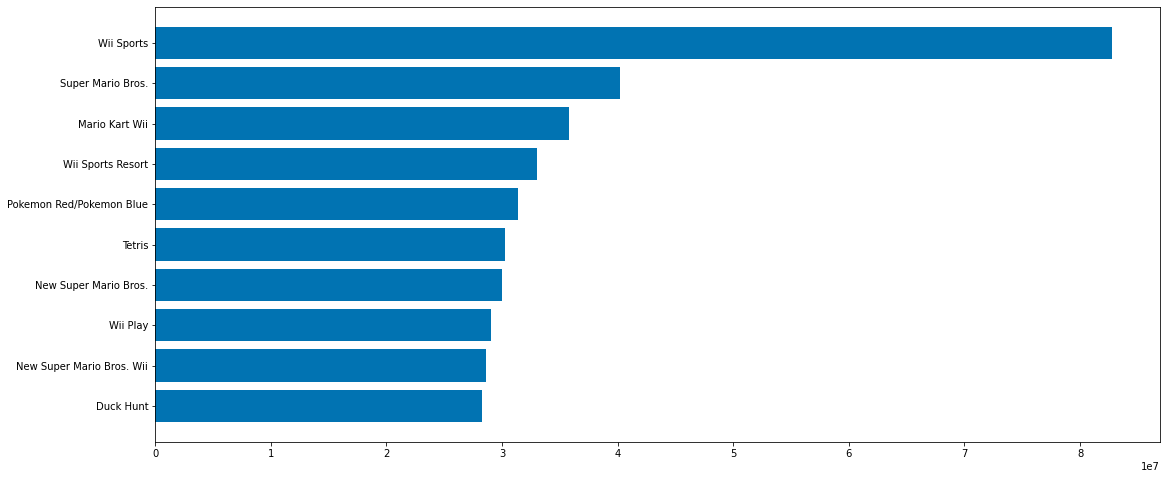

In [ ]:
plt.barh(index,top10.iloc[:,-1])

## Total Sales 기준 top 10

In [ ]:
test_data = top10.iloc[:,-5:-1]
test_data.index = index

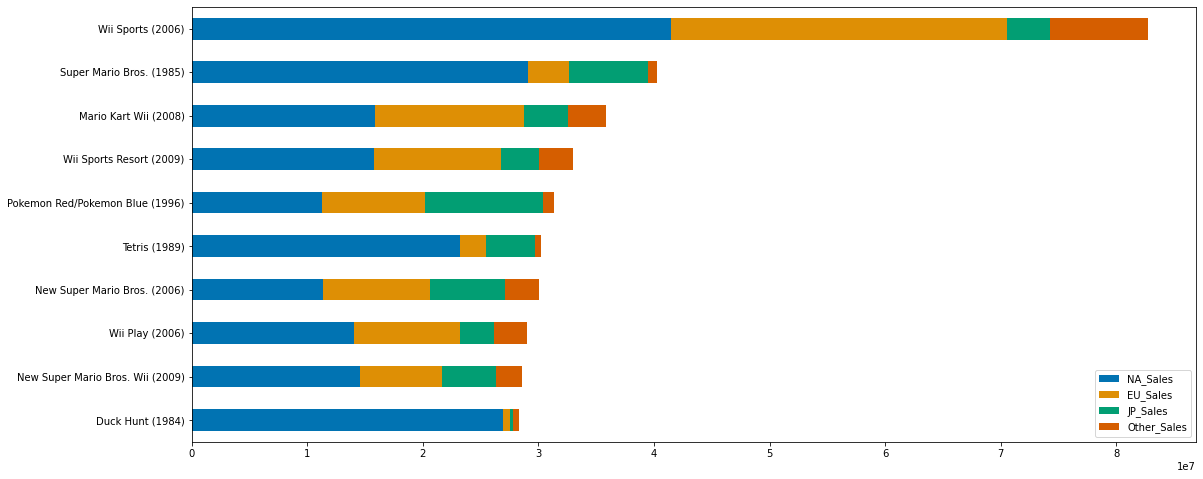

In [ ]:
test_data.plot(kind = 'barh', stacked=True)

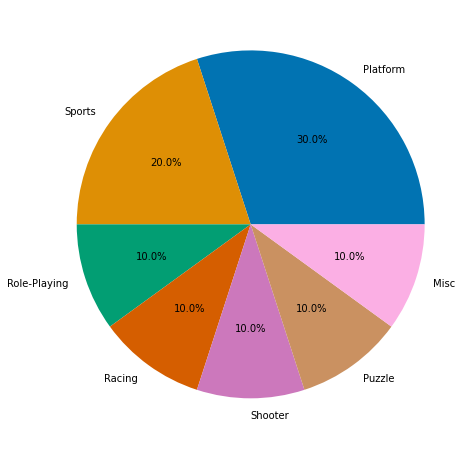

In [ ]:
top10['Genre'].value_counts().plot.pie(autopct='%1.1f%%',ylabel="")

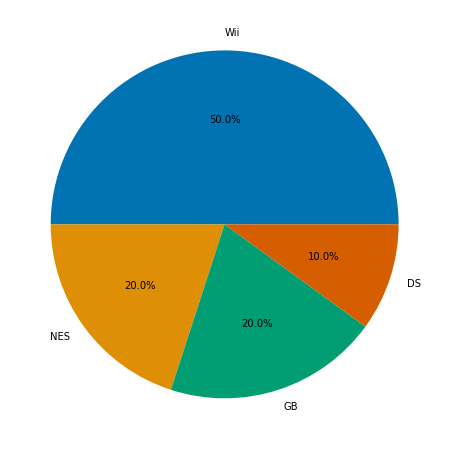

In [ ]:
top10['Platform'].value_counts().plot.pie(autopct='%1.1f%%',ylabel="")

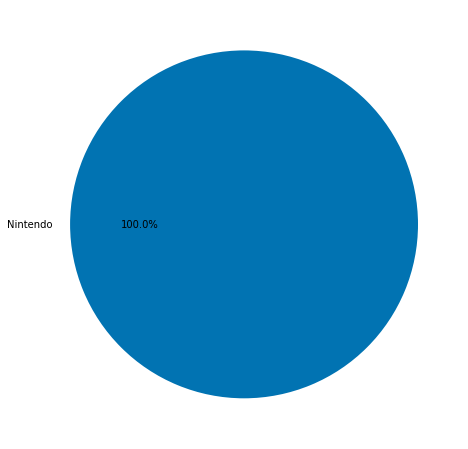

In [ ]:
top10['Publisher'].value_counts().plot.pie(autopct='%1.1f%%',ylabel="")

## NA Sales 기준 top 10

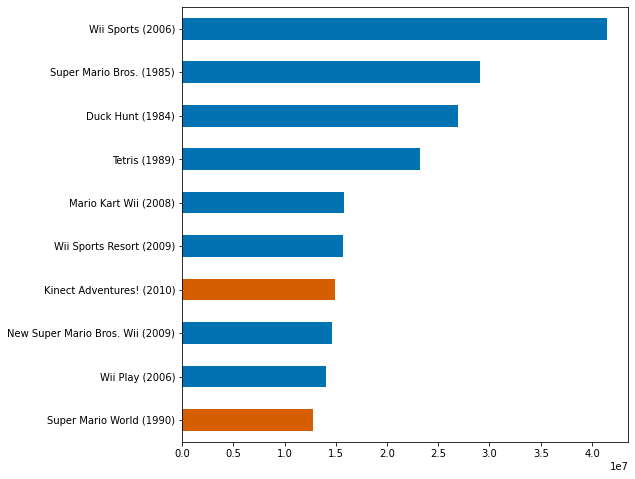

In [ ]:
natop10 = df.sort_values(by='NA_Sales', ascending=False).iloc[:10,:]
natop10 = natop10.sort_values(by='NA_Sales',ascending=True)

lst = merge_list((list(natop10.Name)),(natop10.Year.values.astype(int).astype(str)))
index = []
for i in lst:
    index.append(i[0] + ' (' +i[1] + ')')

data = natop10.iloc[:,-5]
data.index = index

color = np.full(len(data),'#0173b2')
color[[0,3]] = '#d55e00'
data.plot(kind = 'barh', color=color)
plt.rcParams["figure.figsize"] = (8,8);

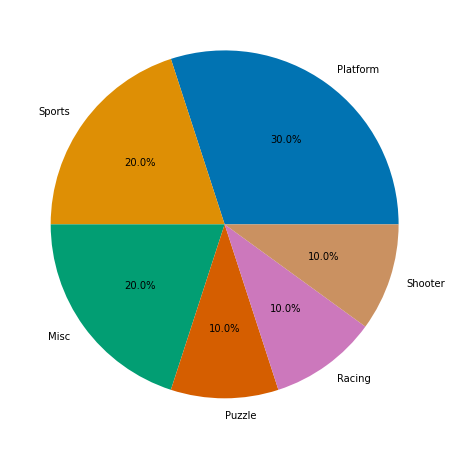

In [ ]:
natop10['Genre'].value_counts().plot.pie(autopct='%1.1f%%',ylabel="")

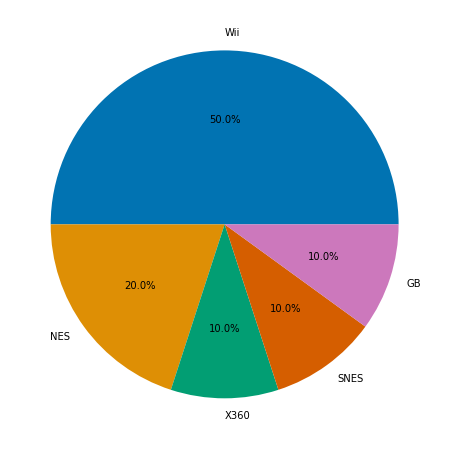

In [ ]:
natop10['Platform'].value_counts().plot.pie(autopct='%1.1f%%',ylabel="")

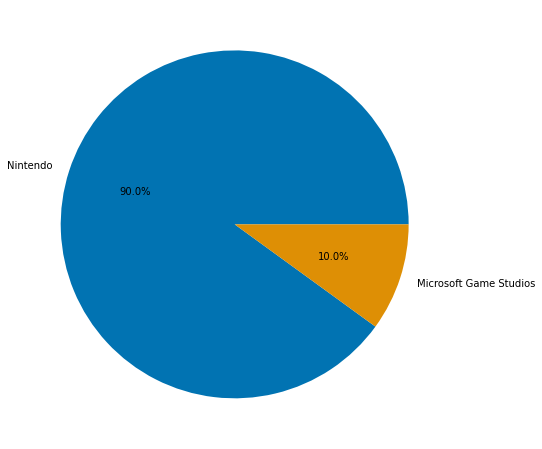

In [ ]:
natop10['Publisher'].value_counts().plot.pie(autopct='%1.1f%%',ylabel="")

#### 새 데이터 만 색 바꾸기

In [ ]:
data

Super Mario World (1990)            12780000.0
Wii Play (2006)                     14030000.0
New Super Mario Bros. Wii (2009)    14590000.0
Kinect Adventures! (2010)           14970000.0
Wii Sports Resort (2009)            15750000.0
Mario Kart Wii (2008)               15850000.0
Tetris (1989)                       23200000.0
Duck Hunt (1984)                    26930000.0
Super Mario Bros. (1985)            29080000.0
Wii Sports (2006)                   41490000.0
Name: NA_Sales, dtype: float64

In [ ]:
data[1:]

Wii Play (2006)                     14030000.0
New Super Mario Bros. Wii (2009)    14590000.0
Kinect Adventures! (2010)           14970000.0
Wii Sports Resort (2009)            15750000.0
Mario Kart Wii (2008)               15850000.0
Tetris (1989)                       23200000.0
Duck Hunt (1984)                    26930000.0
Super Mario Bros. (1985)            29080000.0
Wii Sports (2006)                   41490000.0
Name: NA_Sales, dtype: float64

In [ ]:
data[:1]

Super Mario World (1990)    12780000.0
Name: NA_Sales, dtype: float64

In [ ]:
data[[0,3]]

Super Mario World (1990)     12780000.0
Kinect Adventures! (2010)    14970000.0
Name: NA_Sales, dtype: float64

## EU Sales 기준 top 10


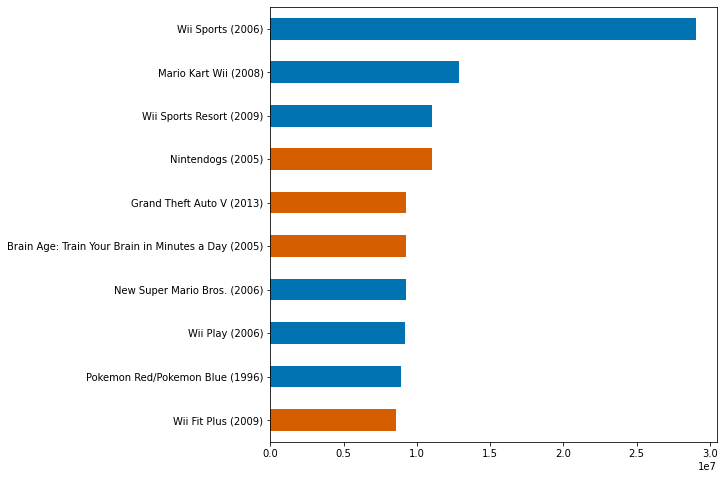

In [ ]:
eutop10 = df.sort_values(by='EU_Sales', ascending=False).iloc[:10,:]
eutop10 = eutop10.sort_values(by='EU_Sales',ascending=True)

lst = merge_list((list(eutop10.Name)),(eutop10.Year.values.astype(int).astype(str)))
index = []
for i in lst:
    index.append(i[0] + ' (' +i[1] + ')')

data = eutop10.iloc[:,-4]
data.index = index

color = np.full(len(data),'#0173b2')
color[[0,4,5,6]] = '#d55e00'
data.plot(kind = 'barh', color=color)
plt.rcParams["figure.figsize"] = (8,8);

## JP Sales 기준 top 10

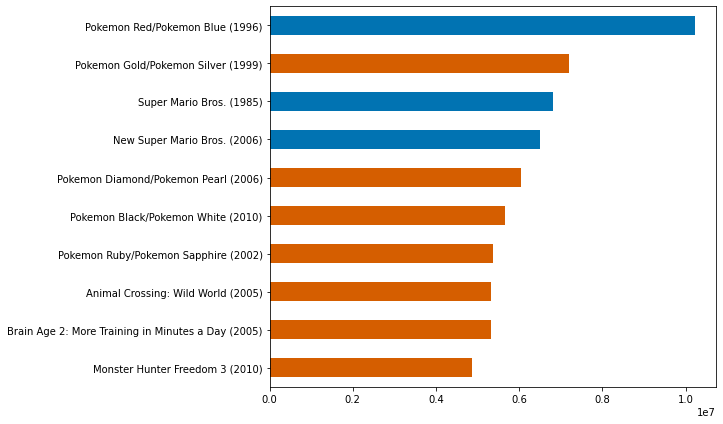

In [ ]:
jptop10 = df.sort_values(by='JP_Sales', ascending=False).iloc[:10,:]
jptop10 = jptop10.sort_values(by='JP_Sales',ascending=True)

lst = merge_list((list(jptop10.Name)),(jptop10.Year.values.astype(int).astype(str)))
index = []
for i in lst:
    index.append(i[0] + ' (' +i[1] + ')')

data = jptop10.iloc[:,-3]
data.index = index

color = np.full(len(data),'#0173b2')
color[[0,1,2,3,4,5,8]] = '#d55e00'
data.plot(kind = 'barh', color=color)
plt.rcParams["figure.figsize"] = (8,8);

## Other_Sales 기준 top 10



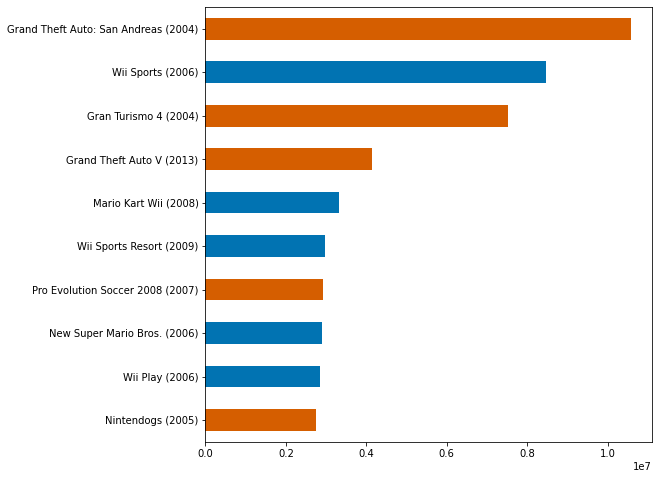

In [ ]:
otop10 = df.sort_values(by='Other_Sales', ascending=False).iloc[:10,:]
otop10 = otop10.sort_values(by='Other_Sales',ascending=True)

lst = merge_list((list(otop10.Name)),(otop10.Year.values.astype(int).astype(str)))
index = []
for i in lst:
    index.append(i[0] + ' (' +i[1] + ')')

data = otop10.iloc[:,-2]
data.index = index

color = np.full(len(data),'#0173b2')
color[[0,3,6,7,9]] = '#d55e00'
data.plot(kind = 'barh', color=color)
plt.rcParams["figure.figsize"] = (8,8);

# 0.1% 제외

- 상위 0.1% 제외
- Q. 0.1%를 제외하면 전체 판매량과의 상관성이 떨어지는 것은 아닐까?
- 상관성이라는 것이 출고량 top 데이터만 상관성을 보이는 것이 아니라, 전체적인 출고량 데이터에서 높은 상관성을 보이는 것이다. 
- 따라서 북미의 지역적 특성을 반영하고 싶을 때는 상위 0.1%는 제외하는 것이 옳다.
- Q. 그러나 내가 하려는 분석은 무엇인가?
- 다음 분기 출시게임
- 상위 0.1% 게임의 경우 마리오나 포켓몬 등 닌텐도사의 초히트 게임이다. 또는 테트리스 등.
- 따라서 '새로운' 게임을 출시한다고 했을 때, 적절치 않다.
- 그러므로 이상치로 간주하고 제외한다.

In [ ]:
df['Total_Sales'].quantile(q=0.999, interpolation='nearest')

21390000.0

In [ ]:
df[df['Total_Sales']>21390000]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
1187,Tetris,GB,1989.0,Puzzle,Nintendo,23200000.0,2260000.0,4220000.0,580000.0,30260000.0
2855,Wii Sports,Wii,2006.0,Sports,Nintendo,41490000.0,29020000.0,3770000.0,8460000.0,82740000.0
2959,Wii Play,Wii,2006.0,Misc,Nintendo,14030000.0,9200000.0,2930000.0,2850000.0,29010000.0
3288,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15750000.0,11010000.0,3280000.0,2960000.0,33000000.0
3367,Wii Fit,Wii,2007.0,Sports,Nintendo,8940000.0,8030000.0,3600000.0,2150000.0,22720000.0
4113,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29080000.0,3580000.0,6810000.0,770000.0,40240000.0
4253,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14970000.0,4940000.0,240000.0,1670000.0,21820000.0
6796,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11380000.0,9230000.0,6500000.0,2900000.0,30010000.0
7673,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11270000.0,8890000.0,10220000.0,1000000.0,31380000.0
9233,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9000000.0,6180000.0,7200000.0,710000.0,23090000.0


원본데이터 복사


In [ ]:
df_copy = df.copy()

In [ ]:
df = df[df['Total_Sales']<21390000]

In [ ]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40000.0,0.0,0.0,0.0,40000.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0,180000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20000.0,0.0,20000.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40000.0,0.0,0.0,0.0,40000.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0,250000.0


In [ ]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
count,16224.000000,1.622400e+04,1.622400e+04,1.622400e+04,1.622400e+04,1.622400e+04
mean,2006.410626,2.487414e+05,1.383278e+05,7.422892e+04,4.577663e+04,5.070747e+05
std,5.827158,5.786300e+05,3.787716e+05,2.707828e+05,1.634625e+05,1.125188e+06
min,1980.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2003.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+04
50%,2007.000000,8.000000e+04,2.000000e+04,0.000000e+00,1.000000e+04,1.700000e+05
75%,2010.000000,2.400000e+05,1.100000e+05,4.000000e+04,4.000000e+04,4.700000e+05
max,2020.000000,1.278000e+07,9.260000e+06,6.040000e+06,1.057000e+07,2.081000e+07


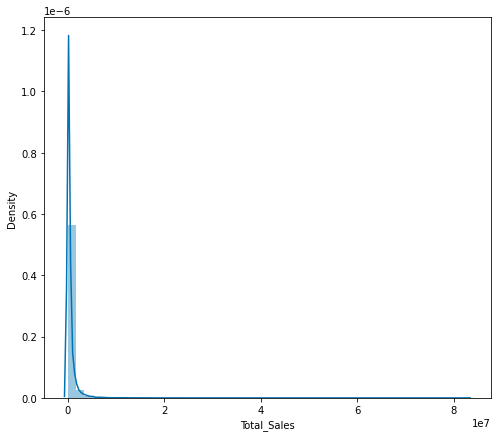

In [ ]:
sns.distplot(df_copy['Total_Sales'])

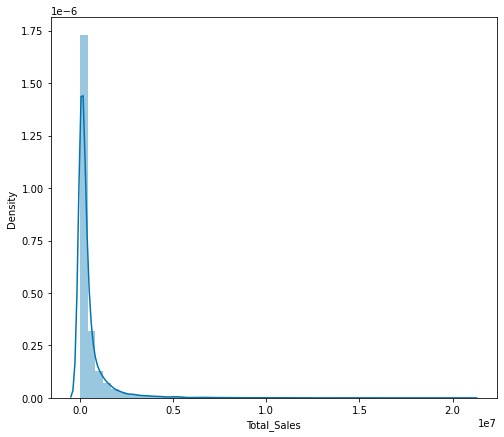

In [ ]:
sns.distplot(df['Total_Sales'])

## top 100 (상위 25%로 대체)
먼저 top100 까지 판매 합을 구해서, 전체 판매 합 대비 top 100 판매 합 비중을 알아보자

In [ ]:
top100_sales_sum = df.sort_values(by=['Total_Sales'], ascending=False).iloc[:100,-1].sum()
total_sales_sum = df.sort_values(by=['Total_Sales'], ascending=False).iloc[:,-1].sum()
top100_sales_sum / total_sales_sum

0.16604780837360386

16%로 전체 데이터에 대한 표현을 하기엔 부족하다.

In [ ]:
df.sort_values(by=['Total_Sales'], ascending=False)

## 상위 25%
- '출고량이 높다'의 기준을 480,000~41,000,000으로 잡았다. 이 기준은 Total_Sales 기준 상위 25%를 나타낸다.
- (Wii Sports 같은 경우 8000만이 넘어가면서 다른 데이터 간 비교가 어려워지기 때문에 분석에선 주로 제외 할 예정)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

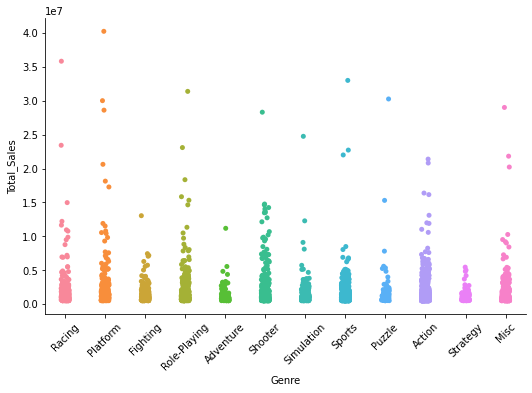

In [ ]:
sns.catplot(data = df[(df['Total_Sales']>480000)&(df['Total_Sales']<41000000)],
            x = 'Genre', 
            y= 'Total_Sales', 
            aspect=12/8)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text major ticklabel objects>)

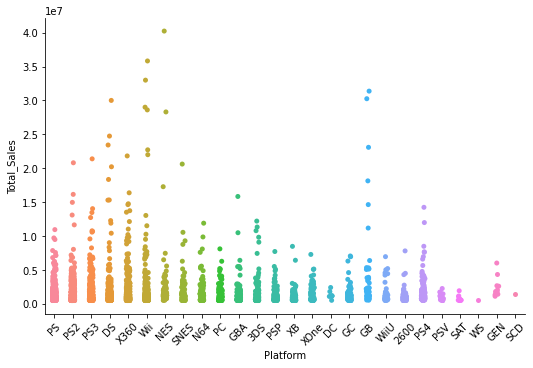

In [ ]:
sns.catplot(data = df[(df['Total_Sales']>480000)&(df['Total_Sales']<41000000)],
            x = 'Platform', 
            y= 'Total_Sales', 
            aspect=12/8)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

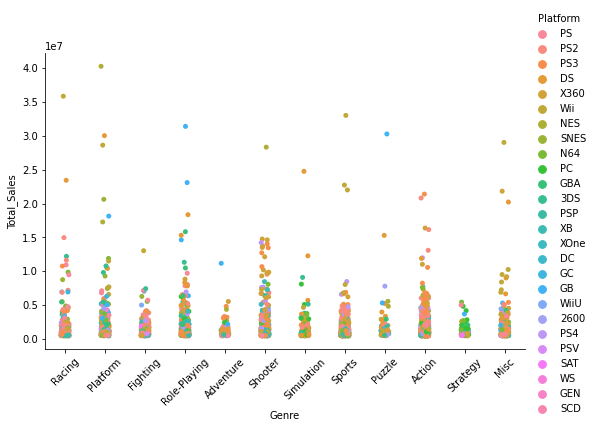

In [ ]:
sns.catplot(data = df[(df['Total_Sales']>480000)&(df['Total_Sales']<41000000)],
            x = 'Genre', 
            y= 'Total_Sales',
            hue = 'Platform', 
            aspect=12/8)
plt.xticks(rotation=45)

In [ ]:
topgroup = df[(df['Total_Sales']>480000)&(df['Total_Sales']<41000000)]

In [ ]:
pd.crosstab(topgroup.Genre, topgroup.Platform)

Platform,2600,3DS,DC,DS,GB,GBA,GC,GEN,N64,NES,PC,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,WS,Wii,WiiU,X360,XB,XOne
Genre,,,,,,,,,,,,,,,,,,,,,,,,,,
Action,18,28,1,48,3,33,19,1,13,12,19,49,126,145,37,33,7,0,0,4,0,62,12,117,26,19
Adventure,0,2,1,25,4,8,2,0,0,1,4,11,4,9,2,2,1,2,0,1,0,8,0,7,1,2
Fighting,1,2,0,4,0,2,7,3,12,3,0,37,46,38,5,13,1,3,0,10,0,8,2,25,10,1
Misc,3,6,0,49,7,17,8,0,5,2,4,28,53,25,3,4,1,0,0,1,0,79,6,37,4,4
Platform,9,10,1,21,12,38,12,5,13,28,0,25,45,18,4,6,2,0,1,14,0,23,10,9,7,0
Puzzle,6,3,0,29,10,7,2,0,1,10,0,7,4,0,0,3,0,1,0,5,0,9,1,0,0,0
Racing,1,3,1,9,2,7,11,0,15,4,0,51,71,37,6,22,1,2,0,3,0,19,2,39,15,6
Role-Playing,0,29,0,44,13,22,7,0,1,10,21,45,44,43,11,20,4,0,0,20,1,8,2,32,6,5
Shooter,16,1,0,6,1,0,6,0,5,7,23,23,58,87,22,13,4,1,0,2,0,17,1,89,39,22


## xxxx년 가장 많이 팔린 게임은?(제외)

In [ ]:
df[df['Year']==2020]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
6765,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,270000.0,0.0,0.0,20000.0,290000.0


In [ ]:
df[df['Year']==2019]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


In [ ]:
df[df['Year']==2018]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


In [ ]:
df[df['Year']==2017].sort_values(by='Total_Sales', ascending=False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
9911,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.0,0.0,30000.0,0.0,30000.0
5196,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.0,0.0,10000.0,0.0,10000.0
14903,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.0,0.0,10000.0,0.0,10000.0


In [ ]:
df[df['Year']==2016].sort_values(by='Total_Sales', ascending=False).head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
15144,FIFA 17,PS4,2016.0,Sports,Electronic Arts,280000.0,3750000.0,60000.0,690000.0,4780000.0
3929,Uncharted 4: A Thief's End,PS4,2016.0,Shooter,Sony Computer Entertainment,1300000.0,2070000.0,180000.0,650000.0,4200000.0
3234,Tom Clancy's The Division,PS4,2016.0,Shooter,Ubisoft,1280000.0,1610000.0,150000.0,570000.0,3610000.0
16084,Far Cry: Primal,PS4,2016.0,Action,Ubisoft,590000.0,1160000.0,60000.0,330000.0,2140000.0
11517,Tom Clancy's The Division,XOne,2016.0,Shooter,Ubisoft,1200000.0,620000.0,0.0,180000.0,2000000.0


# 다음 분기 출시 게임 설계

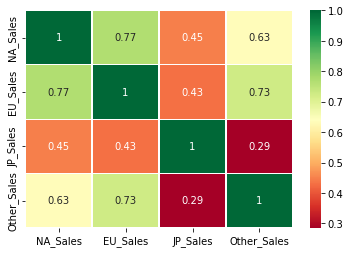

In [ ]:
sns.heatmap(df.drop('Year', axis=1).corr(), annot=True, cmap='RdYlGn',linewidths=0.2)
plt.rcParams["figure.figsize"] = (8,7);

## 2000년대 이후 기준 북미 지역 
1) Genre 장르 결정
- 북미지역에서 평균적으로 많이 출고된 플랫폼, 슈팅, 레이싱, 액션 
- 00년~20년 많이 출고된 액션, 스포츠, 뮤직, 롤플레잉, 레이싱
- 북미 출고량 순위 탑 플랫폼, 스포츠, 뮤직


데이터를 조금더 살펴보자  
조건설정
- NA_Sales 출고량 상위
- Year 2000년대 이후

In [ ]:
NA_df = df[df['Year']>=2000].iloc[:,:6].sort_values(by='NA_Sales',ascending=False)

In [ ]:
NA_df.shape

(14261, 6)

In [ ]:
NA_df.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales
6119,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9670000.0
10695,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9630000.0
14355,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9430000.0
2757,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9030000.0
6107,Call of Duty: Modern Warfare 2,X360,2009.0,Shooter,Activision,8520000.0
5226,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8410000.0
6257,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8250000.0
6160,Halo 3,X360,2007.0,Shooter,Microsoft Game Studios,7970000.0
12337,Halo: Reach,X360,2010.0,Shooter,Microsoft Game Studios,7030000.0
9597,Grand Theft Auto III,PS2,2001.0,Action,Take-Two Interactive,6990000.0


In [ ]:
NA_df10 = NA_df.head(10)

In [ ]:
NA_df10.index = np.arange(1, len(NA_df10) + 1)

In [ ]:
NA_df10.to_csv("NA_df10.csv")

In [ ]:
NA_df.describe()

,Year,NA_Sales
count,14261.000000,1.426100e+04
mean,2007.948391,2.331646e+05
std,4.051094,5.323499e+05
min,2000.000000,0.000000e+00
25%,2005.000000,0.000000e+00
50%,2008.000000,8.000000e+04
75%,2011.000000,2.300000e+05
max,2020.000000,9.670000e+06


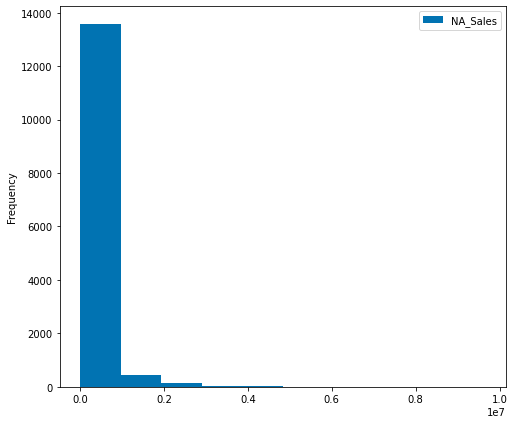

In [ ]:
NA_df.plot(kind='hist', y='NA_Sales')

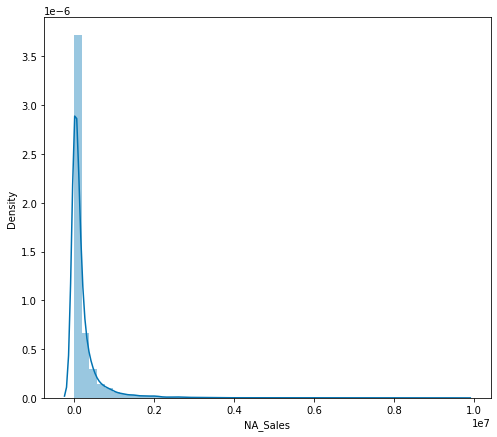

In [ ]:
sns.distplot(NA_df['NA_Sales'])

#### 상위 0.1%

In [ ]:
NA_df['NA_Sales'].quantile(q=0.999, interpolation='nearest')

8940000.0

In [ ]:
NA_df[NA_df['NA_Sales']>8940000]

,Name,Platform,Year,Genre,Publisher,NA_Sales
2855,Wii Sports,Wii,2006.0,Sports,Nintendo,41490000.0
12316,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15850000.0
3288,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15750000.0
4253,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14970000.0
16176,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14590000.0
2959,Wii Play,Wii,2006.0,Misc,Nintendo,14030000.0
6796,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11380000.0
10438,Mario Kart DS,DS,2005.0,Racing,Nintendo,9810000.0
6119,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9670000.0
10695,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9630000.0


#### 출고량 상위 25%

In [ ]:
NA_df['NA_Sales'].quantile(q=0.75, interpolation='nearest')

230000.0

In [ ]:
nadf = NA_df[NA_df['NA_Sales']>230000].sort_values(by='NA_Sales',ascending=False)

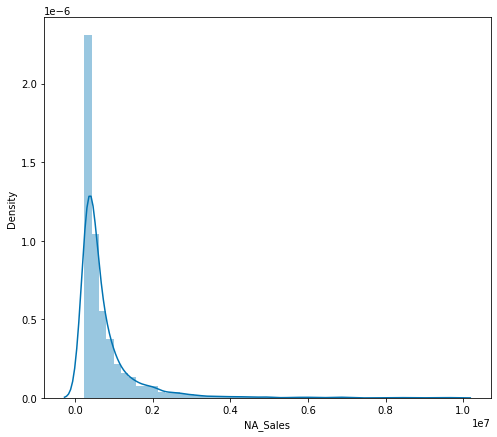

In [ ]:
sns.distplot(nadf['NA_Sales'])

In [ ]:
nadf.describe()

,Year,NA_Sales
count,3475.000000,3.475000e+03
mean,2007.408058,7.693554e+05
std,3.938407,8.773221e+05
min,2000.000000,2.400000e+05
25%,2004.000000,3.200000e+05
50%,2008.000000,4.700000e+05
75%,2010.000000,8.450000e+05
max,2020.000000,9.670000e+06


##### 25%의 25%

In [ ]:
nadf2 = df[(df['Year']>=2000)&(df['NA_Sales']>845000)].iloc[:,:6].sort_values(by='NA_Sales',ascending=False)

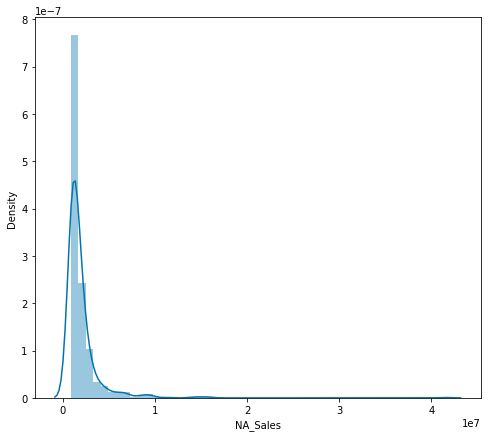

In [ ]:
sns.distplot(nadf2['NA_Sales'])

#### 상위 25% 장르 비중
- 조건추가
- 출고량 상위 25% 분석

게임 데이터 비중

In [ ]:
596850000 / 781

764212.5480153649

In [ ]:
nadf.value_counts('Genre')

Genre
Action          780
Sports          591
Shooter         405
Misc            346
Racing          268
Role-Playing    240
Platform        240
Simulation      207
Fighting        185
Adventure        93
Puzzle           72
Strategy         48
dtype: int64

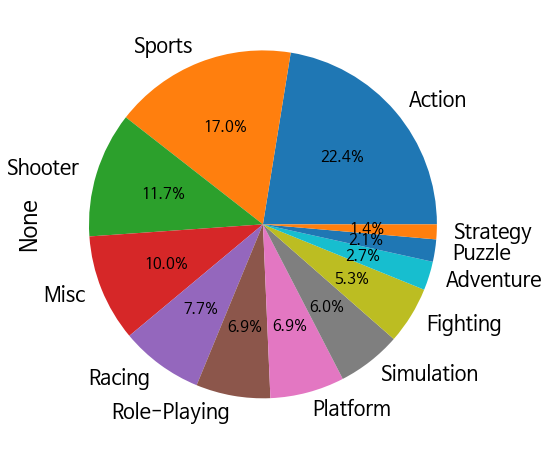

In [ ]:
nadf.value_counts('Genre').plot.pie(autopct='%1.1f%%')

액션 장르 출고 비중

In [ ]:
nadf.groupby('Genre').sum().iloc[:,1].sort_values(ascending=False)

Genre
Action          596850000.0
Sports          486200000.0
Shooter         433010000.0
Misc            287300000.0
Role-Playing    220610000.0
Platform        219360000.0
Racing          215430000.0
Fighting        132870000.0
Simulation      132720000.0
Adventure        48850000.0
Puzzle           43450000.0
Strategy         28840000.0
Name: NA_Sales, dtype: float64

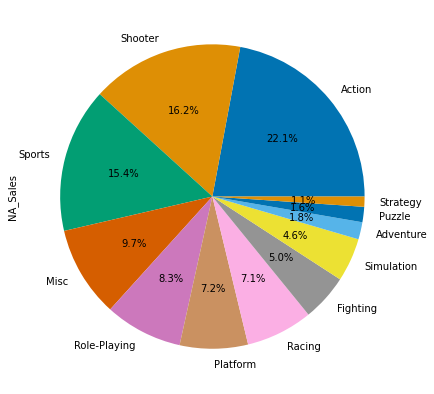

In [ ]:
nadf.groupby('Genre').sum().iloc[:,1].sort_values(ascending=False).plot.pie(autopct='%1.1f%%')

- 전체 출고량 대비 장르별 출고량의 비중은 위와 같다
- 1.Action, 2.Sports, 3.Shooter, 4.Misc, 5.Role-Playing, 6.Platform 순으로 높다.

In [ ]:
nadf.groupby('Genre').mean().iloc[:,1].sort_values(ascending=False)

Genre
Shooter         1.069160e+06
Role-Playing    9.192083e+05
Platform        8.057917e+05
Action          7.562051e+05
Misc            7.465318e+05
Fighting        7.182162e+05
Racing          7.080970e+05
Sports          6.953130e+05
Puzzle          6.034722e+05
Strategy        6.008333e+05
Simulation      5.973430e+05
Adventure       5.252688e+05
Name: NA_Sales, dtype: float64

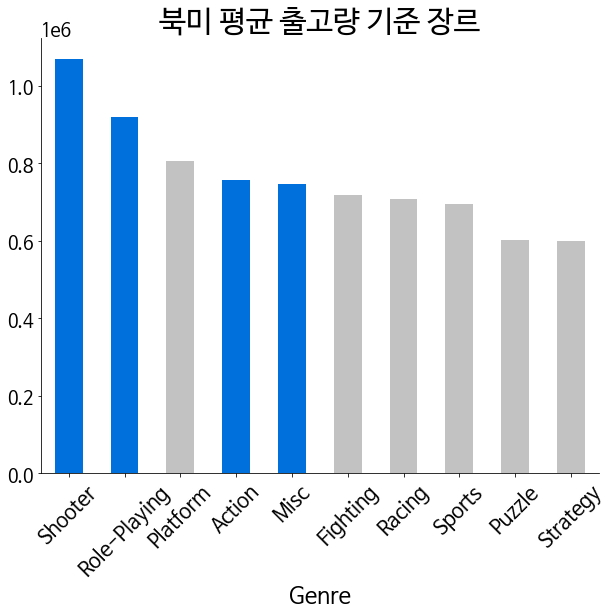

In [ ]:
data = nadf.groupby('Genre').mean().sort_values(by='NA_Sales',ascending=False).iloc[:10,1]
color = np.full(len(data), '#c2c2c2')
color[[0,1,3,4]] = '#0070dd'
data.plot(kind='bar',color=color)

plt.rcParams["figure.figsize"] = (10,8)
plt.xticks(rotation=45)
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.title('북미 평균 출고량 기준 장르');

- 하지만 데이터 개수가 많아 평균을 구해보았다.
- 출고합을 데이터 갯수로 나눠 평균을 구하면 위와 같다. 
- 1.Shooter, 2.Role-Playing, 3.Platform, 4.Misc, 5.Sports, 6.Action
- 출고량 비중으로 봤을 땐, Action과 Sports 장르가 높은 순위를 차지했으나, 후순위로 밀려났고, Role-Playing과 Platform의 순위가 상승하였다.

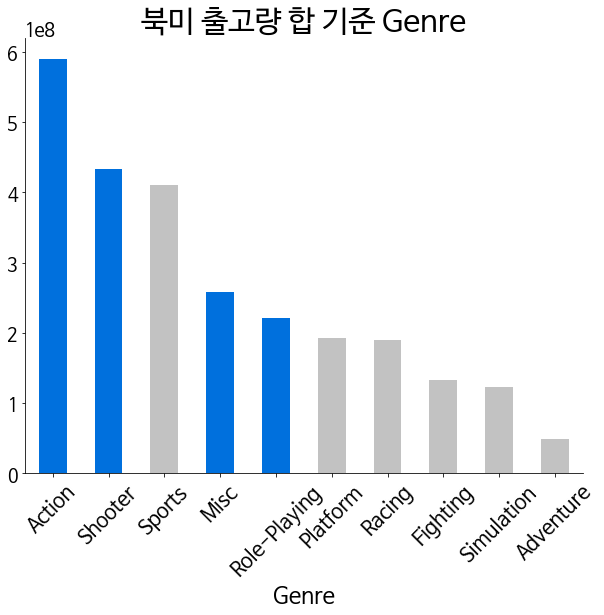

In [ ]:
data = nadf.groupby('Genre').sum().sort_values(by='NA_Sales',ascending=False).iloc[:10,1]
color = np.full(len(data), '#c2c2c2')
color[[0,1,3,4]] = '#0070dd'
data.plot(kind='bar',color=color)

plt.rcParams["figure.figsize"] = (10,8)
plt.xticks(rotation=45)
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.title('북미 출고량 합 기준 Genre');

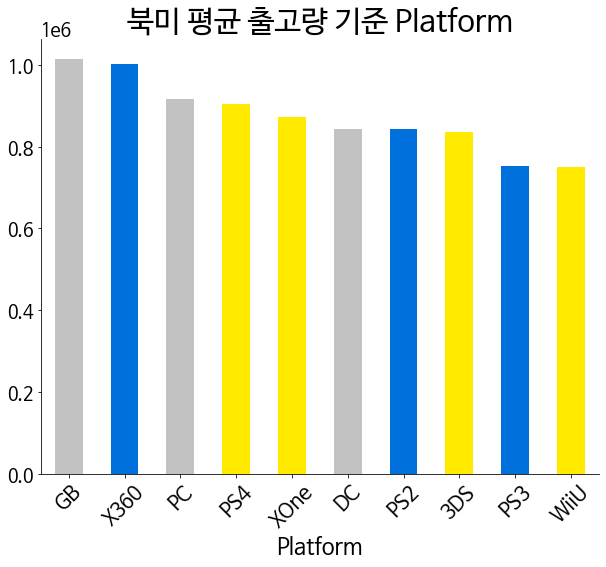

In [ ]:
data = nadf.groupby('Platform').mean().sort_values(by='NA_Sales',ascending=False).iloc[:10,1]
color = np.full(len(data), '#c2c2c2')
color[[1,6,8]] = '#0070dd'
color[[3,4,7,9]] = '#ffea00'
data.plot(kind='bar',color=color)

plt.rcParams["figure.figsize"] = (10,8)
plt.xticks(rotation=45)
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.title('북미 평균 출고량 기준 Platform');

- x360, ps2, ps3, wii, ds 파랑
- xone, ps4, wiiu 3ds 노랑


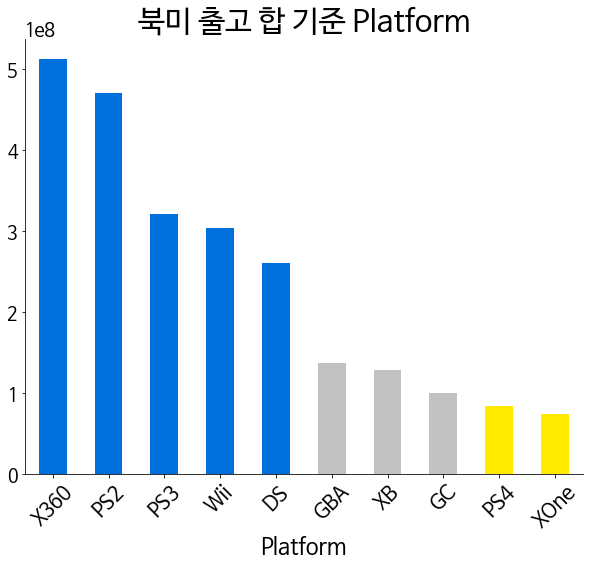

In [ ]:
data = nadf.groupby('Platform').sum().sort_values(by='NA_Sales',ascending=False).iloc[:10,1]
color = np.full(len(data), '#c2c2c2')
color[[0,1,2,3,4]] = '#0070dd'
color[[8,9]] = '#ffea00'
data.plot(kind='bar',color=color)

plt.rcParams["figure.figsize"] = (10,8)
plt.xticks(rotation=45)
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.title('북미 출고 합 기준 Platform');

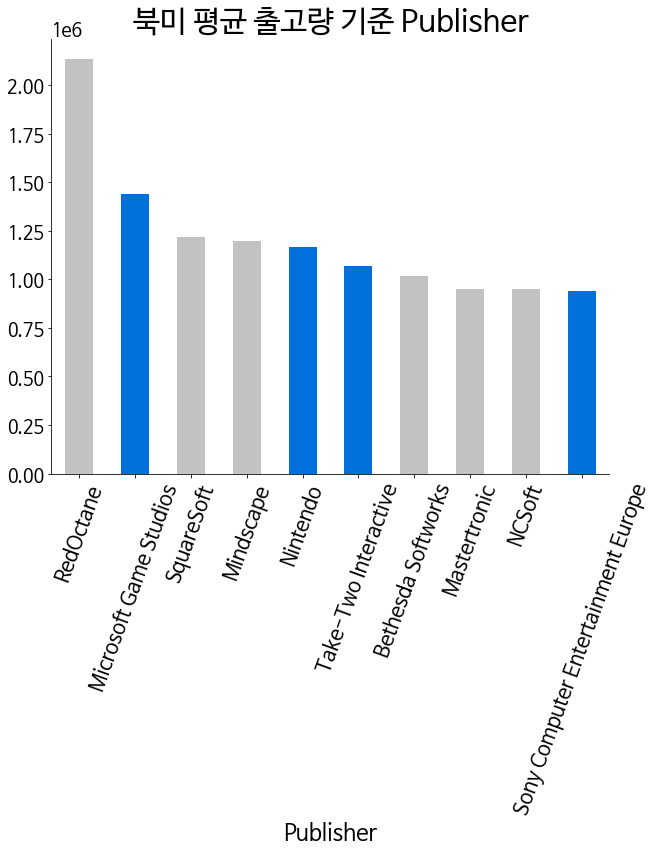

In [ ]:
data = nadf.groupby('Publisher').mean().sort_values(by='NA_Sales',ascending=False).iloc[:10,1]

color = np.full(len(data), '#c2c2c2')
color[[1,4,5,9]] = '#0070dd'
data.plot(kind='bar',color=color)

plt.rcParams["figure.figsize"] = (10,8)
plt.xticks(rotation=70)
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.title('북미 평균 출고량 기준 Publisher');

micro, nintendo, take, sony

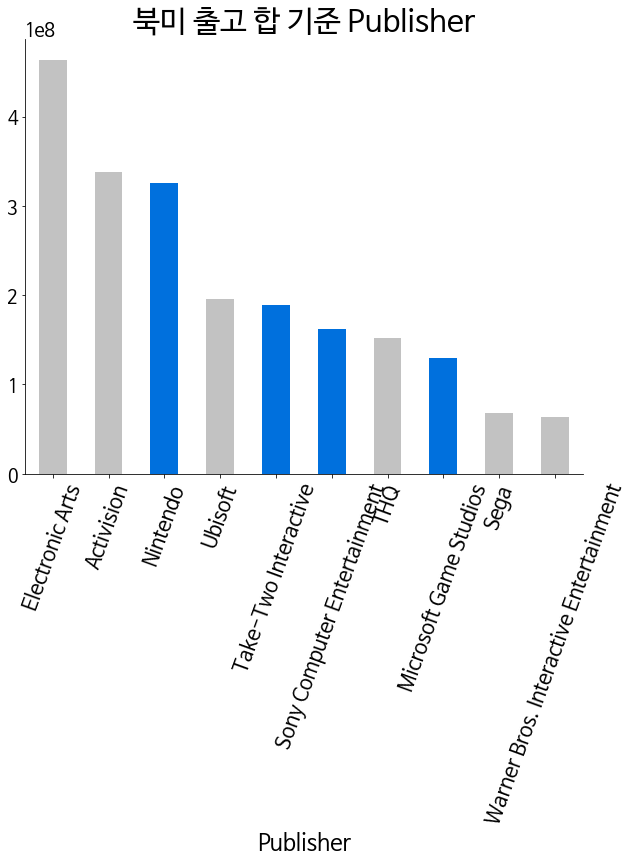

In [ ]:
data = nadf.groupby('Publisher').sum().sort_values(by='NA_Sales',ascending=False).iloc[:10,1]

color = np.full(len(data), '#c2c2c2')
color[[2,4,5,7]] = '#0070dd'
data.plot(kind='bar',color=color)

plt.rcParams["figure.figsize"] = (10,8)
plt.xticks(rotation=70)
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.title('북미 출고 합 기준 Publisher');

In [ ]:
nadf.groupby('Platform').mean().sort_values(by='NA_Sales',ascending=False)

NameError: ignored

# 2000년대 이후 기준 일본 지역
1) Genre 장르 결정